## Q1

__Kernel SVM__

From  sklearn  import  the  Breast  Cancer  dataset.   Draw  the  contour plots generated by fitting an SVM with the following kernels to the data (you can use sklearn’s implementation of SVM):

- (a)  Linear kernel
- (b)  Radial Basis Function (RBF) kernel
- (c)  Polynomial kernel of degree 5



In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, ShuffleSplit

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


cancer = load_breast_cancer()
X = cancer.data[:,:2]
y = cancer.target


C = 1.0  
models = (SVC(kernel='linear', C=C),
          SVC(kernel='rbf', C=C),
          SVC(kernel='poly', degree=5, C=C)
         )
models = (clf.fit(X, y) for clf in models)


titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 5) kernel')


fig, sub = plt.subplots(1,3, figsize=(20,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


for clf, title, ax in zip(models, titles, sub.flatten()):
    
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Q2

__Kernel logistic regression__  In this exercise,  we're interested in using RBF kernel in  logistic  regression.   Report  the  average  area  under  curve  (AUC)  of  10-fold  cross-validation  (where  in  each  fold  you  use  20%  of  the  data  for  testing)  on  the  Breast Cancer dataset using RBF logistic regression (you can use sklearn implementations).

0.10193321616871705
0.10193321616871705
0.10017574692442882
0.10017574692442882
0.10017574692442882
0.10017574692442882
0.10017574692442882
0.0984182776801406
0.0984182776801406
0.0984182776801406


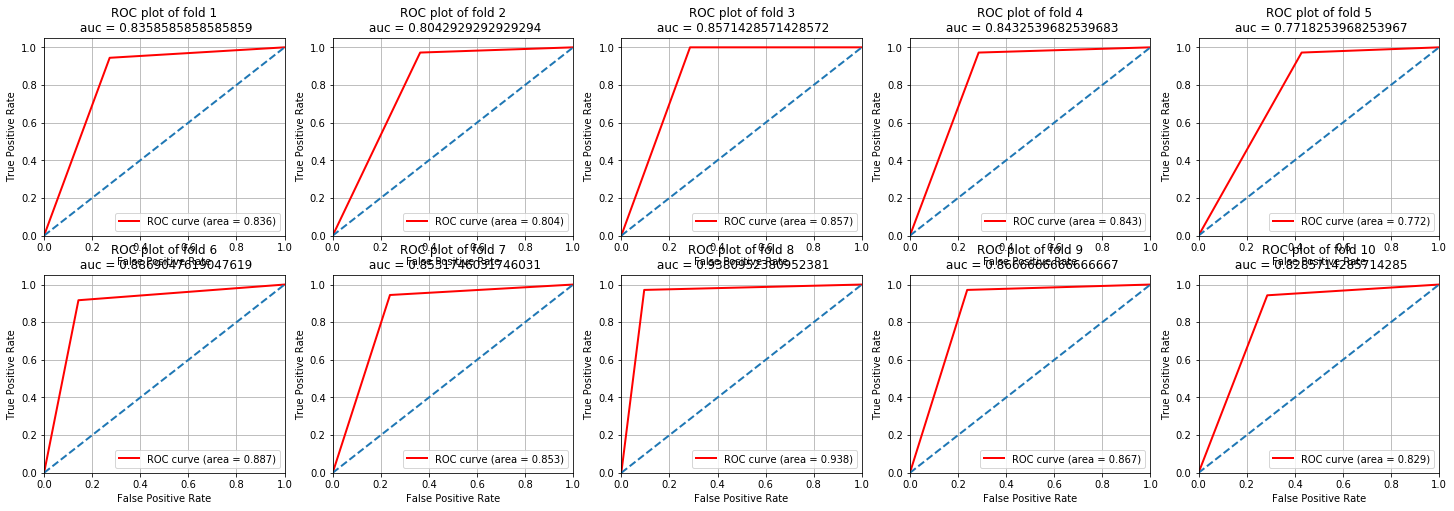

In [19]:
def rbf_kernel(x, mean, sd):
    return np.exp(-1/(2*sd**2)*(x-mean)**2)


def evaluate(X_train, X_test, y_train, y_test, fold):
    clf = LogisticRegression(solver='lbfgs')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    auc_value = auc(fpr, tpr)
    plot_roc(fpr, tpr, auc_value, fold=fold)

def plot_roc(fpr, tpr, auc_value, fold=None):
    plt.subplot(2,5,fold)
    plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.3f)' % auc_value)
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if fold != None:
        plt.title('ROC plot of fold {}\n auc = {}'.format(fold, auc_value))
    else:
        plt.title('ROC plot, auc = {}'.format(auc_value))
    plt.legend(loc="lower right")
    plt.grid(True)

def k_fold_evaluate(X, y):
    # initialization
    accuracy = []
    precision = []
    recall=[]
    f1 = []
    fold = 1
    skf = StratifiedKFold(n_splits=10, random_state=100, shuffle= True)
    
    # rbf
    X = rbf_kernel(X, 0, 1)
    for train_index, test_index in skf.split(X, y):
        print(len(test_index)/(len(X)))
        X_train, X_test, y_train, y_test = X[train_index, :], X[test_index, :], y[train_index], y[test_index]
        evaluate(X_train, X_test, y_train, y_test, fold)
        fold += 1
        
plt.figure(figsize=(25, 8))     
k_fold_evaluate(X, y)
plt.show()

## Q3

__Soft-margin kernel SVM__

Implement  soft-margin SVM with a linear kernel, optimize the objective function according to slides #119-120 of the lecture slides on ”Lectures 15-16 Maximum Margin Linear Classifiers” onthe course website.1Fit your implemented classifier to the Breast Cancer dataset anddraw the contour plot similar to question 1.

mysvm weights: [-0.38895994 -0.09073671  7.76167397]
sklearn weights: [[-0.69566917 -0.13386799]] intercept: [12.93093297]
mysvm predict: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
sklearn predict: [1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1]
-0.38895994344511414 6.981 28.11


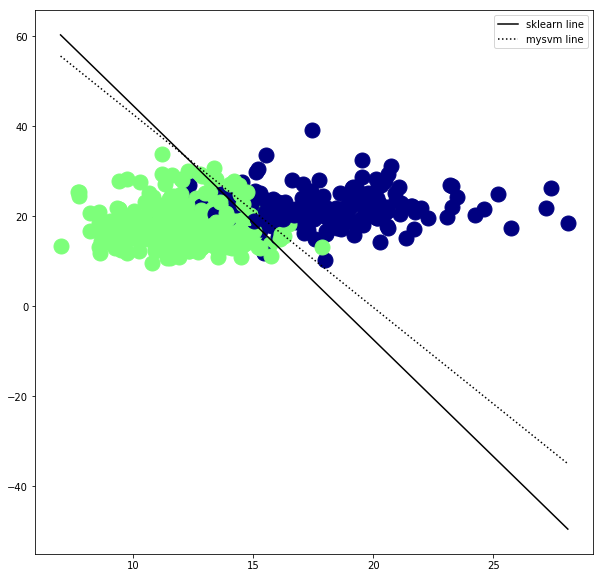

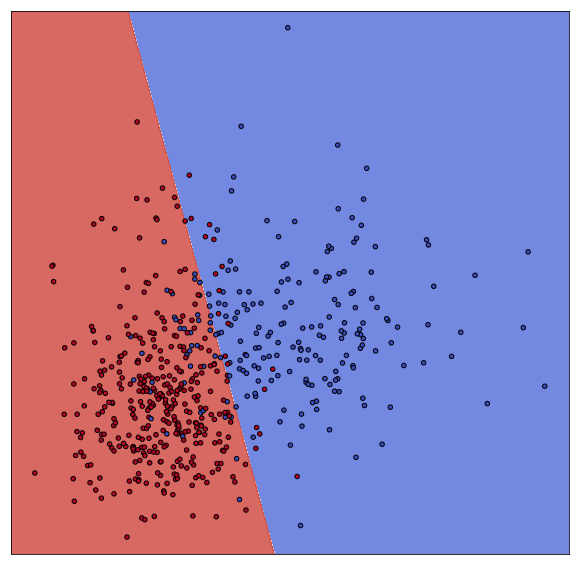

In [26]:
import numpy as np
from scipy import optimize

class SVM2C:
    def __init__(self,x,y,c=3,learning_rate=0.001,
            n_iter=100000,method='GD'):

        self.values=np.unique(y)
        # Add 1 dimension for bias
        self.x=np.hstack([x,np.ones([x.shape[0],1])])
        self.y=np.where(y==self.values[-1],1,-1)
        self.c=c
        self.lr=learning_rate
        self.n_iter=n_iter
        self.method=method

        self.m=len(x)
        self.w=np.random.random(self.x.shape[1])-0.5

    def costFunc(self):
        xw=np.dot(self.x,self.w)
        j=np.maximum(0.,1.-self.y*xw).mean()*self.c+0.5*np.sum(self.w[:-1]**2)
        return j

    def J(self):
        '''Derivative of cost function'''
        xw=np.dot(self.x,self.w)
        I=np.where(self.y*xw>=1.,0.,-self.y)[:,None]
        dj=np.zeros(self.w.shape)
        dj[:-1]=(I*self.x[:,:-1]).mean(axis=0)*self.c+self.w[:-1] # weights
        dj[-1]=(I*self.c).mean(axis=0)                      # bias
        return dj

    def train(self):

        #----------Optimize using scipy.optimize----------
        if self.method=='optimize':
            opt=optimize.minimize(self.costFunc,self.w,args=(self.x,self.y),\
                    J=self.J,method='BFGS')
            self.w=opt.x

        #---------Optimize using Gradient descent---------
        elif self.method=='GD':
            costs=[]
            for _ in range(self.n_iter):
                dj=self.J()
                self.w=self.w-self.lr*dj
                ci=self.costFunc()
                costs.append(ci)

            self.costs=np.array(costs)

        return self


    def predict(self,x):
        x = np.hstack([x,np.ones([x.shape[0],1])])
        y_preds=[]
        for i in x:
            y_pred=np.sign(i.dot(self.w))
            y_pred=self.values[-1] if y_pred>=0 else self.values[0]
            y_preds.append(y_pred)
        y_preds=np.array(y_preds)

        return y_preds

if __name__=='__main__':

    from sklearn import datasets
    cancer=datasets.load_breast_cancer()
    x=cancer.data[:,:2]
    y=cancer.target


    #----------------------Train----------------------
    mysvm=SVM2C(x,y,method='GD')
    mysvm.train()

    ntest=20
    xtest=2*(np.random.random([ntest,2])-0.5)+x.mean(axis=0)

    from sklearn import svm
    clf=svm.SVC(C=50,kernel='linear')
    clf.fit(x,y)

    y_preds=mysvm.predict(xtest)
    y_preds2=clf.predict(xtest)

    print('mysvm weights:', mysvm.w)
    print('sklearn weights:', clf.coef_, 'intercept:', clf.intercept_)
    print('mysvm predict:', y_preds)
    print('sklearn predict:',y_preds2)

    #-------------------Plot------------------------
    import matplotlib.pyplot as plt
    figure=plt.figure(figsize=(10,10))
    ax=figure.add_subplot(111)

    cmap=plt.cm.jet
    nclasses=np.unique(y).tolist()
    colors=[cmap(float(i)/len(nclasses)) for i in nclasses]

    #----------------Plot training data----------------
    for i in range(len(y)):
        xi=x[i][0]
        yi=x[i][1]
        colori=colors[nclasses.index(y[i])]
        ax.plot(xi,yi,color=colori,marker='o',markersize=15)

    #------------------Plot test data------------------
    for i in range(ntest):
        colori=colors[nclasses.index(y_preds2[i])]
        ax.plot(xtest[i][0],xtest[i][1],color=colori,marker='^',markersize=5)

    #--------------------Plot line--------------------
    x1=x[:,0].min()
    x2=x[:,0].max()

    y1=(-clf.intercept_-clf.coef_[0][0]*x1)/clf.coef_[0][1]
    y2=(-clf.intercept_-clf.coef_[0][0]*x2)/clf.coef_[0][1]
    
    y3=(-mysvm.w[-1]-mysvm.w[0]*x1)/mysvm.w[1]
    y4=(-mysvm.w[-1]-mysvm.w[0]*x2)/mysvm.w[1]
    print(mysvm.w[0], x1,x2)
    
    ax.plot([x1,x2],[y1,y2],'-k',label='sklearn line')
    ax.plot([x1,x2],[y3,y4],':k',label='mysvm line')
    ax.legend(loc=0)
    plt.show()
    
    
    # contour
    X0, X1 = x[:, 0], x[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    fig, ax = plt.subplots(1,1, figsize=(10,10))
    plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(())
    plt.yticks(())
    
    plt.show()